In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('D:/creditcard.csv')
df.head()

Using TensorFlow backend.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

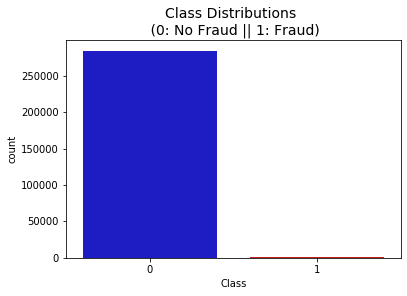

In [3]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [4]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [5]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
a = accuracy_score(y_test, lr_pred)
print("Accuracy Score : ", a*100,"%")


# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

Accuracy Score :  99.92135052386169 %


0    71108
1       94
Name: 0, dtype: int64

In [6]:
# f1 score
print("F1 Score : ", f1_score(y_test, lr_pred))

# recall score
print("Recall Score : ", recall_score(y_test, lr_pred))


F1 Score :  0.7522123893805309
Recall Score :  0.6439393939393939


In [7]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

In [8]:
accuracy_score(y_test, rfc_pred)

0.9995365298727564

In [9]:
print("F1 score : ",f1_score(y_test, rfc_pred))

print("Recall score : ", recall_score(y_test, rfc_pred))

F1 score :  0.8607594936708862
Recall score :  0.7727272727272727


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
gb = gb_clf.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, gb_pred)*100)

Accuracy Score :  99.7415802926884


In [11]:
print("F1 score : ",f1_score(y_test, gb_pred))

print("Recall score : ", recall_score(y_test, gb_pred))

F1 score :  0.17117117117117117
Recall score :  0.14393939393939395


In [12]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
59318,48789.0,-0.892344,1.725185,2.014072,2.969493,-0.358103,0.208247,0.173195,0.508835,-1.421750,...,-0.219772,-0.467348,-0.120825,0.396310,0.197382,0.121402,0.220645,0.091821,8.27,0
74794,55760.0,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,...,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,311.91,1
36734,38667.0,1.179743,-1.164141,1.015352,-0.405885,-1.850985,-0.503236,-1.136412,0.074776,0.133414,...,0.344607,0.785058,-0.164374,0.411598,0.369617,-0.051243,0.022254,0.038167,101.37,0
120837,75978.0,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,-2.909735,...,1.131130,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,99.90,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


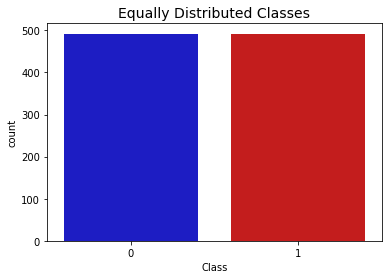

In [13]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [14]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomTreeClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier() 
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    train = classifier.fit(X_train, y_train)
    pred = train.predict(X_test)
    print("Classifiers: ", classifier.__class__.__name__)
    print("Accuracy Score : ", accuracy_score(y_test, pred)*100)
    print("F1 score : ",f1_score(y_test, pred))
    print("Recall score : ", recall_score(y_test, pred))
    print("--------------------------------------------")

Classifiers:  LogisticRegression
Accuracy Score :  99.89993328885924
F1 score :  0.6459627329192548
Recall score :  0.5306122448979592
--------------------------------------------
Classifiers:  RandomForestClassifier
Accuracy Score :  99.95611109160492
F1 score :  0.8587570621468926
Recall score :  0.7755102040816326
--------------------------------------------
Classifiers:  GradientBoostingClassifier
Accuracy Score :  99.89466661985183
F1 score :  0.6629213483146067
Recall score :  0.6020408163265306
--------------------------------------------


In [15]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [16]:
import imblearn

In [17]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [18]:
from imblearn.over_sampling import SMOTE

In [21]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

In [22]:

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomTreeClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier() 
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    train = classifier.fit(Xsm_train, ysm_train)
    pred = train.predict(X_test)
    print("Classifiers: ", classifier.__class__.__name__)
    print("Accuracy Score : ", accuracy_score(y_test, pred)*100)
    print("F1 score : ",f1_score(y_test, pred))
    print("Recall score : ", recall_score(y_test, pred))
    print("--------------------------------------------")

Classifiers:  LogisticRegression
Accuracy Score :  98.71492373809726
F1 score :  0.16893732970027248
Recall score :  0.8773584905660378
--------------------------------------------
Classifiers:  RandomForestClassifier
Accuracy Score :  99.96067526193085
F1 score :  0.8600000000000001
Recall score :  0.8113207547169812
--------------------------------------------
Classifiers:  GradientBoostingClassifier
Accuracy Score :  99.47332940085953
F1 score :  0.3267504488330341
Recall score :  0.8584905660377359
--------------------------------------------
